# <center>NLP: TRAITEMENT AUTOMATIQUE DU LANGUAGE NATUREL.</center> 
            NB: Dans ce projet nous n'utiliserons pas d'algoriyhmes de machine learning car pas necessaire pour notre projet. Suivant la pipeline(etapes) de modelisation NLP nous nous arreterons a l'etape de vectorisation(presentation du texte en chiffre) car suffisant pour le calcul de similarité. 

 ### OBJECTIF: 
        * Analyse textuelle
        * Comprendre la relation entre les Données
        * Visualisation de données textuelles
        * Mettre sur pied du systeme de cacul similarité.  

    Le NLP(Natural Language Processing) , ou traitement automatique des langues (TALN), est une branche de l’intelligence artificielle qui s’attache à donner la capacité aux machines de comprendre, générer ou traduire le langage humain tel qu’il est écrit et/ou parlé.
    
### Etapes a suivre:
* Nettoyage des données
    * Tokenisation
    * Elimination des mots sans valeur ajoutée (stop words)
    * Reduction de la taille du document
* Vectorisation
* Calcul de similarité
* Exporter la solution avec joblib
---

### Importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Lecture du dataset

In [2]:
df = pd.read_csv("Ressources/RessourcesAnalyse/DatasetClean.csv")
df

,Maladies,Symptomes,Traitement,Examens
0,endométriose,"douleurs pelviennes intenses,douleurs pendant ...","médicaments anti-inflammatoires,chirurgie,trai...","imagerie médicale (échographie pelvienne),lapa..."
1,anémie ferriprive,"fatigue intense,faiblesse générale,palpitation...","suppléments de fer,ajustement du régime alimen...","analyse de sang (taux de fer),numération sangu..."
2,trouble bipolaire,"variations extrêmes d'humeur,irritabilité ,ins...","médicaments stabilisateurs de l'humeur,thérapi...","évaluation psychiatrique,entretiens cliniques"
3,maladie de lyme,éruption cutanée en forme de cible (érythème m...,"antibiotiques,médicaments anti-inflammatoires,...","test sanguin (détection d'anticorps),analyse d..."
4,schizophrénie,"hallucinations auditives,hallucinations olfact...","antipsychotiques,thérapie psychosociale,hospit...","évaluation psychiatrique,entretiens cliniques,..."
...,...,...,...,...
96,paludisme,"fièvre,frissons,maux de tête,fatigue","antipaludiques,repos",test de dépistage du paludisme
97,bilharziose (schistosomiase),"fièvre,toux,éruption cutanée,douleurs musculaires","antiparasitaires,antibiotiques",examen microscopique des selles ou de l'urine
98,trypanosomiase africaine,"fièvre,fatigue,maux de tête,ganglions enflés","médicaments antiparasitaires,antibiotiques",test sanguin
99,maladie de chagas,"fièvre,fatigue,gonflement des paupières,troubl...","médicaments antiparasitaires,médicaments pour ...","test sanguin,électrocardiogramme (ecg)"


## I - Nettoyage de données 

In [3]:
stop_words = stopwords.words('french')
lemmatizer = WordNetLemmatizer()

ps = PorterStemmer()

In [4]:
new_stopwords =["facilement","tres","pendant"]

stop_words.extend(new_stopwords)

In [5]:
def Cleaning(text, param = 1):
    
    def remove_s(word):
        if word.endswith('s'):
            return word[:-1]
        if word.endswith('ment'):
            return word[:-4]
        else:
            return word
        
    liste2 = ["abdomin ","abdomen","abdominal"]
    liste1 = ["douleur","mal"]
        
    # Supprimer des ponctuations
    text = re.sub("[^\w\s]", " ", text)
    if param == 1:
        text = ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words])
    else:
        text = ' '.join([ps.stem(unidecode(word.lower())) for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words])
        
    # supprimer les chiffres
    text = re.sub("\d", "", text)
    
    #text = [remove_s(word) for word in text]
    
    text = text.replace("ee ","e ")
    text = text.replace("cutane","peau")
    
    for i in liste2:
        text = text.replace(i,"ventre ")
        
    text = list(OrderedDict.fromkeys(text.split()))
    
    text = ' '.join([remove_s(word) for word in text])
    
    for i in liste1:
        text = text.replace(i,"maux")
    
    text = text.replace(" e "," ")
    return text



In [6]:
df["Symptomes_lem_token"] = df["Symptomes"].apply(lambda x: Cleaning(x))
df["Symptomes_lem_token"]

0      maux pelvienne intense règle rapport sexuel lo...
1      fatigue intense faiblesse générale palpitation...
2      variation extrême humeur irritabilité insomnie...
3      éruption cutanée forme cible érythème migrant ...
4      hallucination auditive olfactive visuelle idée...
                             ...                        
96                      fièvre frisson maux tête fatigue
97          fièvre toux éruption cutanée maux musculaire
98               fièvre fatigue maux tête ganglion enflé
99      fièvre fatigue gonfle paupière trouble cardiaque
100    fièvre prolongée perte poid anémie enflure rat...
Name: Symptomes_lem_token, Length: 101, dtype: object

## II -  Vectorisation 

In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Symptomes_lem_token"]).toarray()
print(tfidf_matrix.shape)

(101, 397)


In [8]:
feature_names = tfidf_vectorizer.get_feature_names_out()
len(feature_names)

397

In [9]:
df3 = pd.DataFrame(tfidf_matrix,columns=feature_names)
df3.head()

,abondant,accè,activité,affectif,affecté,aine,aisselle,anal,anaux,angine,...,épai,épaissie,épuise,équilibre,éruption,érythème,érythémateuse,éternuement,étourdissement,œil
0,0.240003,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.195173,0.0
2,0.000000,0.0,0.19298,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.155118,0.243631,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.00000,0.233277,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [10]:
df_tif = pd.DataFrame(df3.sum(), columns=["Values"])

In [11]:
df_tif = df_tif.sort_values("Values",ascending=False)
df_tif_30 = df_tif.head(30)
df_tif_30.head()

,Values
maux,9.560995
fatigue,7.916061
fièvre,7.118853
perte,6.278097
poid,5.634208


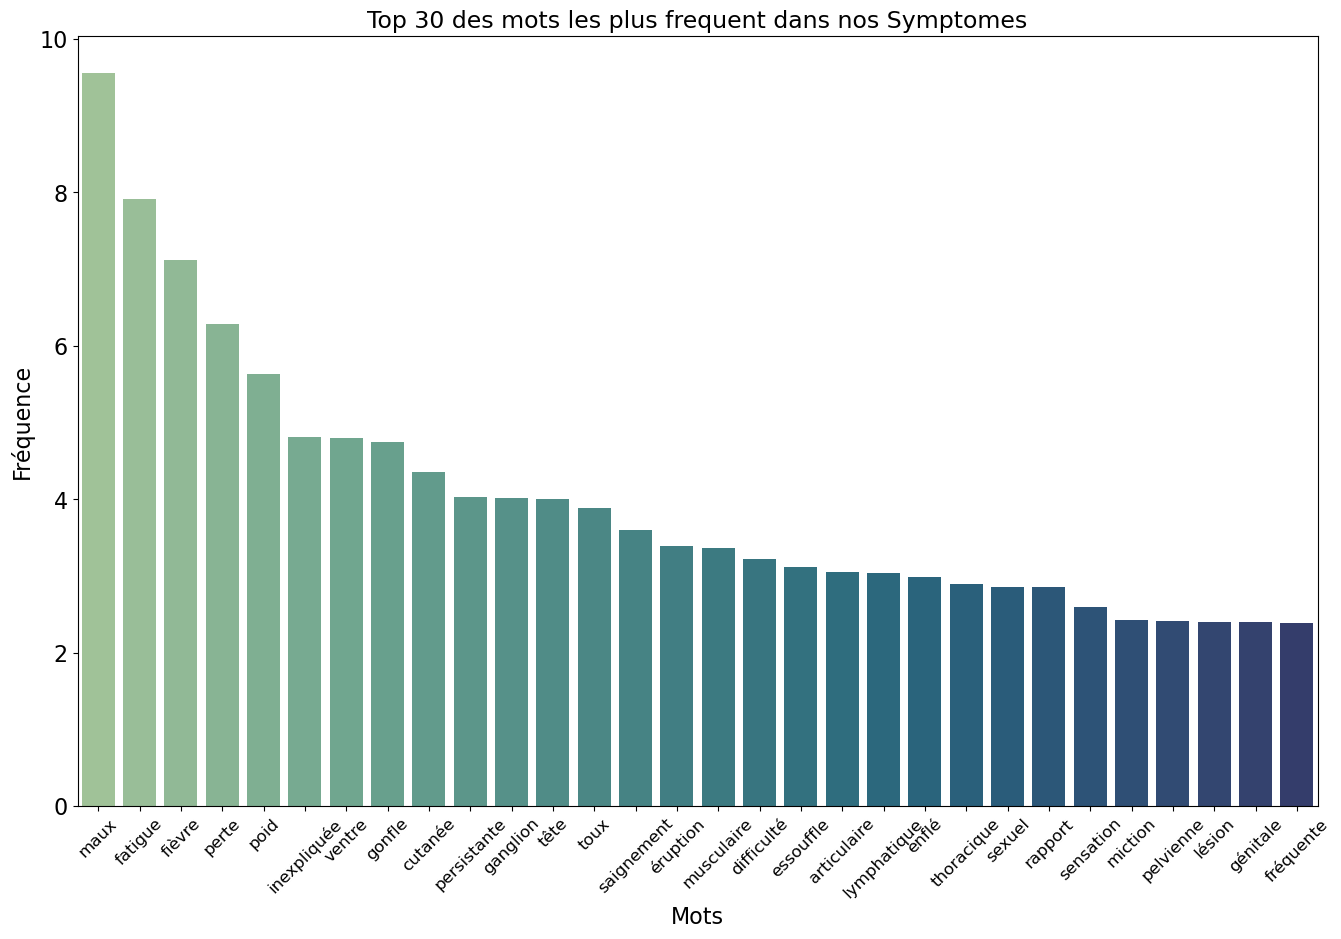

In [12]:
# affichons les 30 mots les plus present dans nos Symptomes
fig = plt.figure(figsize = (16, 10))

g = sns.barplot(
    x = df_tif_30.index,
    y = df_tif_30["Values"],
    data = df_tif_30,
    palette = 'crest'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation = 45,
    fontsize = 12
)

plt.yticks(fontsize=16)
plt.xlabel('Mots', fontsize = 16)
plt.ylabel('Fréquence', fontsize = 16)
plt.title("Top 30 des mots les plus frequent dans nos Symptomes", fontsize = 17)
# Exporter le graphique en tant qu'image pnj
plt.savefig('Ressources/EDA VISUELS/Top 30 des mots les plus frequent  dans nos Symptomes.png', dpi=500);
plt.show()

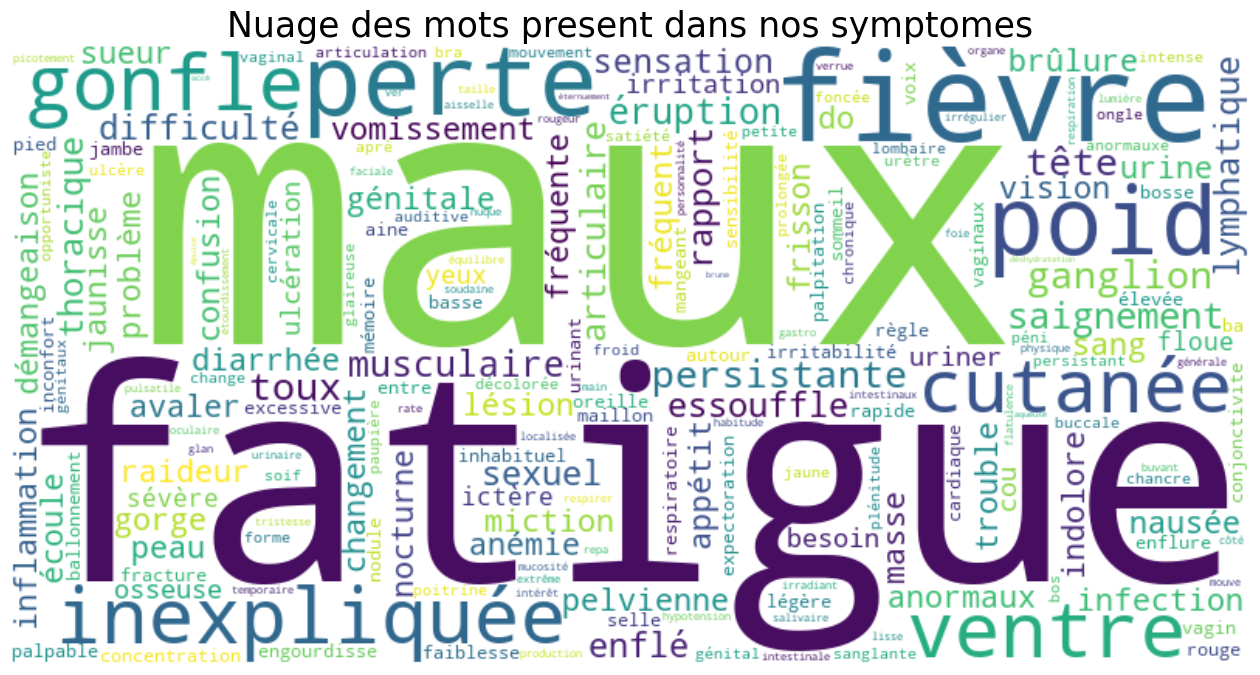

In [13]:
# Création d'un dictionnaire à partir du DataFrame
dictionnaire_mots_poids = dict(zip(df_tif.index,df_tif["Values"]))

# Création de l'objet WordCloud avec generate_from_frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(dictionnaire_mots_poids)

# Affichage du WordCloud à l'aide de matplotlib
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Supprimer les axes
plt.title('Nuage des mots present dans nos symptomes', fontsize = 25)
# Exporter le graphique en tant qu'image pnj
plt.savefig('Ressources/EDA VISUELS/Nuage des mots present dans nos symptomes.png', dpi=500);
plt.show()

## III -  Calcul de similarité

In [14]:
liste_symptomes ="j'ai la fievres douala poid peau perte fatigue//. frissons yaya essouflement yaounde maux facilement , la ,   tête"
liste_symptomes = Cleaning(liste_symptomes, param = 0)

In [15]:
df["Symptomes_stem_token"] = df["Symptomes"].apply(lambda x: Cleaning(x, param = 0))
df["Symptomes_stem_token"]

0      maux pelvienn inten regl rapport sexuel lombai...
1      fatigu inten faibles general palpit cardiaqu e...
2      variat extrem humeur irritabilit insomni parle...
3      erupt peau form cibl erythem migrant fatigu fi...
4      hallucin audit olfact visuel ide delirant trou...
                             ...                        
96                        fievr frisson maux tete fatigu
97                  fievr toux erupt peau maux musculair
98                  fievr fatigu maux tete ganglion enfl
99           fievr fatigu gonfle paupier troubl cardiaqu
100      fievr prolonge pert poid anemi enflur rate foie
Name: Symptomes_stem_token, Length: 101, dtype: object

In [16]:
df.head()

,Maladies,Symptomes,Traitement,Examens,Symptomes_lem_token,Symptomes_stem_token
0,endométriose,"douleurs pelviennes intenses,douleurs pendant ...","médicaments anti-inflammatoires,chirurgie,trai...","imagerie médicale (échographie pelvienne),lapa...",maux pelvienne intense règle rapport sexuel lo...,maux pelvienn inten regl rapport sexuel lombai...
1,anémie ferriprive,"fatigue intense,faiblesse générale,palpitation...","suppléments de fer,ajustement du régime alimen...","analyse de sang (taux de fer),numération sangu...",fatigue intense faiblesse générale palpitation...,fatigu inten faibles general palpit cardiaqu e...
2,trouble bipolaire,"variations extrêmes d'humeur,irritabilité ,ins...","médicaments stabilisateurs de l'humeur,thérapi...","évaluation psychiatrique,entretiens cliniques",variation extrême humeur irritabilité insomnie...,variat extrem humeur irritabilit insomni parle...
3,maladie de lyme,éruption cutanée en forme de cible (érythème m...,"antibiotiques,médicaments anti-inflammatoires,...","test sanguin (détection d'anticorps),analyse d...",éruption cutanée forme cible érythème migrant ...,erupt peau form cibl erythem migrant fatigu fi...
4,schizophrénie,"hallucinations auditives,hallucinations olfact...","antipsychotiques,thérapie psychosociale,hospit...","évaluation psychiatrique,entretiens cliniques,...",hallucination auditive olfactive visuelle idée...,hallucin audit olfact visuel ide delirant trou...


In [17]:
df.to_excel('Ressources/RessourcesAnalyse/DTfinal.xlsx', index=False)
df.to_csv('Ressources/RessourcesAnalyse/DTfinal.csv', index=False)
df.to_json('Ressources/RessourcesAnalyse/DTfinal.json')

In [18]:
tif2 = TfidfVectorizer()

cosine_similarite = []
feature_names = []

for i in range(len(df["Symptomes_stem_token"])):
    tfidf2 = tif2.fit_transform([df['Symptomes_stem_token'][i]]).toarray()
    feature_name = tif2.get_feature_names_out()
    liste_symptome = " ".join([i for i in feature_name if i in liste_symptomes.split()])
    #liste_symptome = " ".join([i for i in df['Symptomes_stem_token'][i].split()  if i in liste_symptomes.split()])
    cosine_similaritie = cosine_similarity(tfidf2, tif2.transform([liste_symptome]))[0]
    cosine_similarite.append(cosine_similaritie)
    #feature_name = tif2.get_feature_names_out()
    feature_names.extend(feature_name)
    
len(feature_names)

1327

In [19]:
cosine_similaritie = np.array(cosine_similarite)

In [20]:
df['Similarite_%'] = 100*cosine_similaritie.flatten()

In [21]:
df['Similarite_%']

0       27.216553
1       37.796447
2       17.960530
3       50.518149
4        0.000000
          ...    
96     100.000000
97      70.710678
98      81.649658
99      57.735027
100     61.237244
Name: Similarite_%, Length: 101, dtype: float64

In [22]:
df_tri = df.sort_values(by='Similarite_%', ascending=False)

In [27]:
print(liste_symptomes)
df_tri[['Maladies','Traitement','Examens',"Similarite_%"]]

fievr douala poid peau pert fatigu frisson yaya essoufl yaound maux tete


,Maladies,Traitement,Examens,Similarite_%
96,paludisme,"antipaludiques,repos",test de dépistage du paludisme,100.000000
84,varicelle,"antihistaminiques,antipyrétiques,calamine pour...",les symptômes sont souvent suffisants pour le ...,84.515425
98,trypanosomiase africaine,"médicaments antiparasitaires,antibiotiques",test sanguin,81.649658
97,bilharziose (schistosomiase),"antiparasitaires,antibiotiques",examen microscopique des selles ou de l'urine,70.710678
78,otite,"antibiotiques (si bactérienne),analgésiques,go...",examen de l'oreille par un professionnel de la...,70.710678
...,...,...,...,...
2,trouble bipolaire,"médicaments stabilisateurs de l'humeur,thérapi...","évaluation psychiatrique,entretiens cliniques",17.960530
87,coqueluche,"antibiotiques,vaccin de rappel",prélèvement de sécrétions nasales pour la culture,0.000000
22,condylomes génitaux (hpv),"crèmes antivirales,ablation des verrues","test hpv,examen visuel",0.000000
42,maladie de parkinson,"médicaments dopaminergiques,thérapie physique,...","examen neurologique,imagerie cérébrale,tests s...",0.000000
